### NLP(Natural Language Processing)

##### 텍스트 데이터의 특징
1. 심한잡음
2. 형태소분석
3. 구문론과 의미론 존재
4. 다양한 언어특성
5. 신경망에 입력하려면 기호를 수치로 변환해야 함

In [1]:
directory = './data/aclImdb/test/'

In [2]:
import os

In [3]:
x,y = [],[]
for name in ['neg','pos']:
    curr = directory+name
    for filename in os.listdir(curr):
        if filename[-4:] == '.txt':
            with open(os.path.join(curr,filename),encoding='utf-8') as f:
                x.append(f.read())
                y.append(name)

In [4]:
x[0], y[0]

("Once again Mr. Costner has dragged out a movie for far longer than necessary. Aside from the terrific sea rescue sequences, of which there are very few I just did not care about any of the characters. Most of us have ghosts in the closet, and Costner's character are realized early on, and then forgotten until much later, by which time I did not care. The character we should really care about is a very cocky, overconfident Ashton Kutcher. The problem is he comes off as kid who thinks he's better than anyone else around him and shows no signs of a cluttered closet. His only obstacle appears to be winning over Costner. Finally when we are well past the half way point of this stinker, Costner tells us all about Kutcher's ghosts. We are told why Kutcher is driven to be the best with no prior inkling or foreshadowing. No magic here, it was all I could do to keep from turning it off an hour in.",
 'neg')

#### 텐서플로가 제공하는 IMDB - 쓰기 좋게 가공되어 있음

In [5]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Embedding
from tensorflow.keras import preprocessing

In [6]:
dic_size = 10000 # 사전의 크기(사전에 있는 단어 개수)
sample_size = 512 # 샘플의 크기

In [7]:
# tensorflow가 제공하는 간소한 버전의 IMDB 읽기

In [8]:
(x_train,y_train),(x_test,y_test) = imdb.load_data(num_words=dic_size)

In [9]:
# 단어를 숫자, 숫자를 단어로 변환하는데 쓰는 표(표는 딕셔너리로 구현)
word2id = imdb.get_word_index()
id2word = {word:id for id,word in word2id.items()}

In [10]:
word2id

{'fawn': 34701,
 'tsukino': 52006,
 'nunnery': 52007,
 'sonja': 16816,
 'vani': 63951,
 'woods': 1408,
 'spiders': 16115,
 'hanging': 2345,
 'woody': 2289,
 'trawling': 52008,
 "hold's": 52009,
 'comically': 11307,
 'localized': 40830,
 'disobeying': 30568,
 "'royale": 52010,
 "harpo's": 40831,
 'canet': 52011,
 'aileen': 19313,
 'acurately': 52012,
 "diplomat's": 52013,
 'rickman': 25242,
 'arranged': 6746,
 'rumbustious': 52014,
 'familiarness': 52015,
 "spider'": 52016,
 'hahahah': 68804,
 "wood'": 52017,
 'transvestism': 40833,
 "hangin'": 34702,
 'bringing': 2338,
 'seamier': 40834,
 'wooded': 34703,
 'bravora': 52018,
 'grueling': 16817,
 'wooden': 1636,
 'wednesday': 16818,
 "'prix": 52019,
 'altagracia': 34704,
 'circuitry': 52020,
 'crotch': 11585,
 'busybody': 57766,
 "tart'n'tangy": 52021,
 'burgade': 14129,
 'thrace': 52023,
 "tom's": 11038,
 'snuggles': 52025,
 'francesco': 29114,
 'complainers': 52027,
 'templarios': 52125,
 '272': 40835,
 '273': 52028,
 'zaniacs': 52130,

In [11]:
# sorted(id2word.items(),reverse = True)
# sorted(id2word.items())[:20]
for i in range(1,21):
    print(id2word[i],end='/')

the/and/a/of/to/is/br/in/it/i/this/that/was/as/for/with/movie/but/film/on/

In [12]:
# 단어 임베딩
embed_space_dim = 16 # 16차원의 임베딩 공간

x_train = preprocessing.sequence.pad_sequences(x_train,maxlen=sample_size)
x_test = preprocessing.sequence.pad_sequences(x_test,maxlen=sample_size)
# 512보다 작은 샘플은 pad_sequence 함수가 특수 문자로 채움

In [13]:
# 신경망 모델 설계 및 학습
embed = Sequential()
embed.add(Embedding(input_dim=dic_size, output_dim=embed_space_dim,input_length=sample_size))
embed.add(Flatten())
embed.add(Dense(32,activation='relu'))
embed.add(Dense(1,activation='sigmoid'))
embed.compile(loss=tf.keras.losses.binary_crossentropy,optimizer='Adam',metrics=['accuracy'])
hist = embed.fit(x_train,y_train, epochs=20, batch_size = 64, validation_data=(x_test,y_test), verbose=2)

Epoch 1/20
391/391 - 3s - loss: 0.4480 - accuracy: 0.7538 - val_loss: 0.2834 - val_accuracy: 0.8792 - 3s/epoch - 8ms/step
Epoch 2/20
391/391 - 3s - loss: 0.1651 - accuracy: 0.9391 - val_loss: 0.3272 - val_accuracy: 0.8657 - 3s/epoch - 7ms/step
Epoch 3/20
391/391 - 3s - loss: 0.0586 - accuracy: 0.9854 - val_loss: 0.3659 - val_accuracy: 0.8724 - 3s/epoch - 7ms/step
Epoch 4/20
391/391 - 3s - loss: 0.0157 - accuracy: 0.9978 - val_loss: 0.4380 - val_accuracy: 0.8654 - 3s/epoch - 7ms/step
Epoch 5/20
391/391 - 3s - loss: 0.0039 - accuracy: 0.9998 - val_loss: 0.4766 - val_accuracy: 0.8689 - 3s/epoch - 7ms/step
Epoch 6/20
391/391 - 3s - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.5109 - val_accuracy: 0.8697 - 3s/epoch - 7ms/step
Epoch 7/20
391/391 - 3s - loss: 7.9897e-04 - accuracy: 1.0000 - val_loss: 0.5366 - val_accuracy: 0.8701 - 3s/epoch - 7ms/step
Epoch 8/20
391/391 - 3s - loss: 5.1024e-04 - accuracy: 1.0000 - val_loss: 0.5595 - val_accuracy: 0.8703 - 3s/epoch - 7ms/step
Epoch 9/20
391/3

In [14]:
embed.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 512, 16)           160000    
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 32)                262176    
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 422,209
Trainable params: 422,209
Non-trainable params: 0
_________________________________________________________________


In [15]:
# 모델 평가   sklearn 에서는 평가로 .score를 씀
res = embed.evaluate(x_test,y_test, verbose = 1)
res

782/782 [==============================] - 1s 1ms/step - loss: 0.7510 - accuracy: 0.8704


[0.751010000705719, 0.8704000115394592]

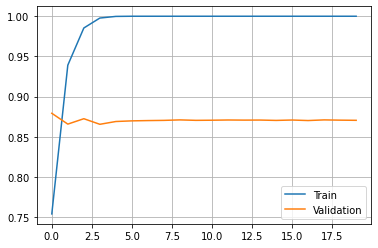

In [16]:
import matplotlib.pyplot as plt

# 학습곡선
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.legend(['Train','Validation'])
plt.grid()
plt.show()

In [17]:
# 시계열 정보를 단어 임베딩을 이용해서 반영
# 위에서 한건 단어임베딩에 다층 퍼셉트론(신경망)을 적용 >> LSTM 이용 안함 >> 시계열 정보를 이용 못함
# epochs가 2.5를 조금 넘어서면서 부터 거의 개선사항이 없음 >> 조기 종료됨
# 조기종료 : 훈련집합을 덜 수렴했어도 검증집합에 대해 성능개선이 없으면 종료

In [18]:
from tensorflow.keras.layers import LSTM
from tensorflow.keras.callbacks import EarlyStopping

In [19]:
# 조기종료
early = EarlyStopping(monitor='val_accuracy', patience=5,restore_best_weights=True)

In [20]:
# 신경망 모델 설계 및 학습(LSTM)
embed = Sequential()
embed.add(Embedding(input_dim=dic_size, output_dim=embed_space_dim, input_length=sample_size))
embed.add(LSTM(units=32))
embed.add(Dense(1,activation='sigmoid'))
embed.compile(loss=tf.keras.losses.binary_crossentropy, optimizer='Adam', metrics=['accuracy'])
hist = embed.fit(x_train,y_train, epochs=20, batch_size=64, validation_split=0.2, verbose=2, callbacks=[early])

Epoch 1/20
313/313 - 32s - loss: 0.5494 - accuracy: 0.7225 - val_loss: 0.4019 - val_accuracy: 0.8174 - 32s/epoch - 101ms/step
Epoch 2/20
313/313 - 29s - loss: 0.3069 - accuracy: 0.8763 - val_loss: 0.3376 - val_accuracy: 0.8550 - 29s/epoch - 94ms/step
Epoch 3/20
313/313 - 29s - loss: 0.2392 - accuracy: 0.9076 - val_loss: 0.3454 - val_accuracy: 0.8704 - 29s/epoch - 92ms/step
Epoch 4/20
313/313 - 29s - loss: 0.1886 - accuracy: 0.9319 - val_loss: 0.3293 - val_accuracy: 0.8790 - 29s/epoch - 93ms/step
Epoch 5/20
313/313 - 28s - loss: 0.1703 - accuracy: 0.9396 - val_loss: 0.3479 - val_accuracy: 0.8710 - 28s/epoch - 90ms/step
Epoch 6/20
313/313 - 29s - loss: 0.1265 - accuracy: 0.9579 - val_loss: 0.3713 - val_accuracy: 0.8682 - 29s/epoch - 91ms/step
Epoch 7/20
313/313 - 28s - loss: 0.1013 - accuracy: 0.9690 - val_loss: 0.4160 - val_accuracy: 0.8586 - 28s/epoch - 90ms/step
Epoch 8/20
313/313 - 28s - loss: 0.1042 - accuracy: 0.9653 - val_loss: 0.4393 - val_accuracy: 0.8612 - 28s/epoch - 90ms/step

In [21]:
res = embed.evaluate(x_test,y_test, verbose = 2)
res

782/782 - 17s - loss: 0.3502 - accuracy: 0.8678 - 17s/epoch - 21ms/step


[0.3502446115016937, 0.8678399920463562]

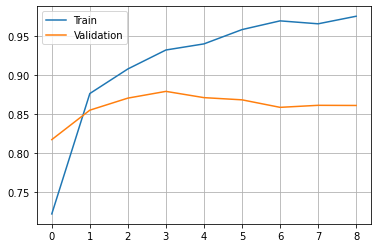

In [22]:
# 학습곡선
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.legend(['Train','Validation'])
plt.grid()
plt.show()

<!-- # 문제점
# 빈도수에 따라서 분류했음
# 문장의 의미를 파악해서 분류한건 아님 -->

##### 문제점
- 빈도수에 따라서 분류했음
- 문장의 의미를 파악해서 분류한건 아님

- 문장의  의미를 가지고 해당 문장이 긍정이다 부정이다 판단하는 알고리즘
1. word2vec(구글) : 1000억개 가량의 뉴스 데이터를 가지고 학습하며 300만개 가량의 데이터를 300차원공간에 표현
2. GloVe(스탠포드 대학) : 위키피디아 문서 데이터를 사용하며 40만개 가량의 데이터를 50, 100, 200, 300차원 공간에 표현

In [23]:
import os
import numpy as np
from scipy.spatial import distance  # 단어사이의 거리 : 연관관계

In [24]:
# IMDB의 원본데이터 읽기
# 앞에서 3개의 단어만 추출 - loop를 3회전만 수행
fname = './data/glove.6B.100d.txt'  # 차원수가 100차원
with open(fname, encoding='utf-8') as f:
    for idx,line in enumerate(f):
        print(type(line))
        print(line)
        if idx == 2: break   # idx == 0 부터 무수히 큰 수 까지

<class 'str'>
the -0.038194 -0.24487 0.72812 -0.39961 0.083172 0.043953 -0.39141 0.3344 -0.57545 0.087459 0.28787 -0.06731 0.30906 -0.26384 -0.13231 -0.20757 0.33395 -0.33848 -0.31743 -0.48336 0.1464 -0.37304 0.34577 0.052041 0.44946 -0.46971 0.02628 -0.54155 -0.15518 -0.14107 -0.039722 0.28277 0.14393 0.23464 -0.31021 0.086173 0.20397 0.52624 0.17164 -0.082378 -0.71787 -0.41531 0.20335 -0.12763 0.41367 0.55187 0.57908 -0.33477 -0.36559 -0.54857 -0.062892 0.26584 0.30205 0.99775 -0.80481 -3.0243 0.01254 -0.36942 2.2167 0.72201 -0.24978 0.92136 0.034514 0.46745 1.1079 -0.19358 -0.074575 0.23353 -0.052062 -0.22044 0.057162 -0.15806 -0.30798 -0.41625 0.37972 0.15006 -0.53212 -0.2055 -1.2526 0.071624 0.70565 0.49744 -0.42063 0.26148 -1.538 -0.30223 -0.073438 -0.28312 0.37104 -0.25217 0.016215 -0.017099 -0.38984 0.87424 -0.72569 -0.51058 -0.52028 -0.1459 0.8278 0.27062

<class 'str'>
, -0.10767 0.11053 0.59812 -0.54361 0.67396 0.10663 0.038867 0.35481 0.06351 -0.094189 0.15786 -0.81665 0.14

In [25]:
# 사전 구축(딕셔너리 자료구조로 표현)
dictionary = {}
with open(fname, encoding='utf-8') as f:
    for line in f:
        li = line.split()
        word = li[0]
        vector = np.array(li[1:],dtype=np.float32)
        dictionary[word] = vector

In [26]:
# 가장 가까운 단어를 찾아주는 함수
def find_closest_words(vector):
    return sorted(dictionary.keys(), key=lambda w: distance.euclidean(dictionary[w],vector))

In [27]:
# 가장 가까운 단어 찾기
# movie와 가장 가까운 5개 단어를 찾기
print(find_closest_words(dictionary['movie'])[:5])
print(find_closest_words(dictionary['school'])[:5])
print(find_closest_words(dictionary['seoul'])[:5])
print(find_closest_words(dictionary['music'])[:5])
print(find_closest_words(dictionary['sports'])[:5])

['movie', 'film', 'movies', 'films', 'hollywood']
['school', 'college', 'schools', 'elementary', 'students']
['seoul', 'pyongyang', 'beijing', 'tokyo', 'korea']
['music', 'musical', 'dance', 'songs', 'pop']
['sports', 'sport', 'soccer', 'basketball', 'baseball']


In [28]:
# 단어의 연관관계를 추론
find_closest_words(dictionary['seoul'] - dictionary['korea'] + dictionary['spain'])

['madrid',
 'spain',
 'santiago',
 'seville',
 'valencia',
 'aires',
 'barcelona',
 'buenos',
 'sofia',
 'rome',
 'marbella',
 'istanbul',
 'lopez',
 'juan',
 'spanish',
 'amsterdam',
 'rosario',
 'strasbourg',
 'rabat',
 'lisbon',
 'majorca',
 'paris',
 'monaco',
 'prohertrib',
 'caracas',
 'catalonia',
 'salgado',
 'costa',
 'gonzalez',
 'bilbao',
 'torres',
 'marquez',
 'spaniards',
 'havana',
 'metro',
 'cordoba',
 'budapest',
 'naples',
 'sanchez',
 'catalan',
 'carlos',
 'lyon',
 'luis',
 'alicante',
 'fernando',
 'burgos',
 'garcia',
 'portugal',
 'nicolas',
 'miguel',
 'brussels',
 'rodriguez',
 'guadalajara',
 'puerto',
 'marseille',
 'flores',
 'rafael',
 'bogota',
 'andalusia',
 'gomez',
 'mendoza',
 'quito',
 'fernandez',
 'francisco',
 'manuel',
 'guayaquil',
 'gabriel',
 'carlo',
 'sebastian',
 'jose',
 'mexico',
 'palma',
 'stockholm',
 'jaime',
 'nieto',
 'venzuel',
 'montreal',
 'antwerp',
 'hamburg',
 'medina',
 'bogotá',
 'cortes',
 'bucharest',
 'romero',
 'jimenez'

In [29]:
# 고차원을 2차원 또는 2차원으로 축소, 데이터를 가시화하는 기법
# PCA, iso-contour and so on
# TSNE가 가장 뛰어남
# TSNE를 이용해서 100차원 벡터를 2차원으로 변환

In [30]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [31]:
# TSNE를 이용해서 2차원 공간으로 축소하고 시각화
tsne = TSNE(n_components = 2, random_state=32, learning_rate=1.2)
words = list(dictionary.keys())

In [32]:
vectors = np.array([dictionary[word] for word in dictionary.keys()])

In [33]:
vectors_tsne_100 = tsne.fit_transform(vectors[:100])# 앞에 있는 100개만 시각화
vectors_tsne_100

array([[-3.1063879 ,  1.0197144 ],
       [ 0.10520451, -0.31332344],
       [-0.15260476, -0.11487289],
       [-3.892927  ,  1.1752746 ],
       [ 3.3467681 , -0.62596095],
       [ 0.03579895, -0.57515657],
       [-2.799573  , -0.79007846],
       [-1.66399   ,  1.7048512 ],
       [ 5.7144423 ,  3.9138105 ],
       [-3.8379972 ,  3.5729206 ],
       [-2.374054  ,  0.44597024],
       [ 0.7722344 , -6.964129  ],
       [ 1.2595422 ,  1.476455  ],
       [-3.363504  ,  0.12843761],
       [-0.31828454,  2.0204816 ],
       [ 0.37502423,  4.04097   ],
       [ 3.6666527 ,  4.9518414 ],
       [-4.148058  , -0.5979248 ],
       [ 0.2079491 ,  5.010566  ],
       [-1.3996735 ,  0.69534004],
       [ 0.40953243,  1.145622  ],
       [-4.755854  , -0.05824452],
       [-4.568119  , -2.923496  ],
       [ 4.8923364 , -3.917595  ],
       [ 4.812011  , -3.8934948 ],
       [-2.6662493 , -1.4745758 ],
       [-1.3265872 ,  6.042073  ],
       [ 5.7425575 ,  2.8007696 ],
       [ 5.601396  ,

In [34]:
vectors.shape

(400000, 100)

In [35]:
vectors_tsne_100.shape

(100, 2)

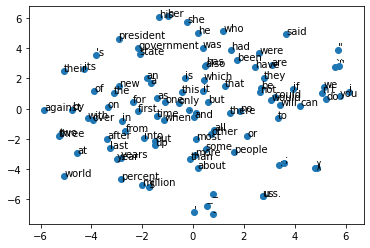

In [36]:
import seaborn as sns
# sns.scatterplot(data=vectors_tsne_100)
plt.scatter(vectors_tsne_100[:,0],vectors_tsne_100[:,1])

for i in range(100):
    plt.annotate(words[i],xy=(vectors_tsne_100[i,0],vectors_tsne_100[i,1]))
    
# plt.annotate(words[10],xy=(vectors_tsne_100[10,0],vectors_tsne_100[10,0]))